<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [183]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [184]:
df = pd.read_csv('./data/Wholesale customers data.csv')

# Display the first few rows of the dataset
print(df.head())
print('#####################')
# Display the summary statistics of the dataset
print(df.describe())
print('#####################')

print(df.info())
print('#####################')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
#####################
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3

In [185]:
print(df.isnull().sum())

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


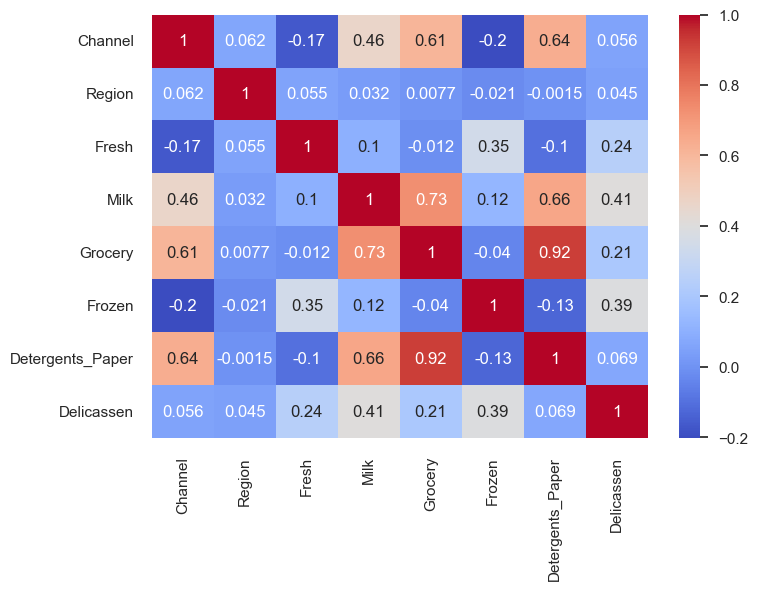

In [186]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

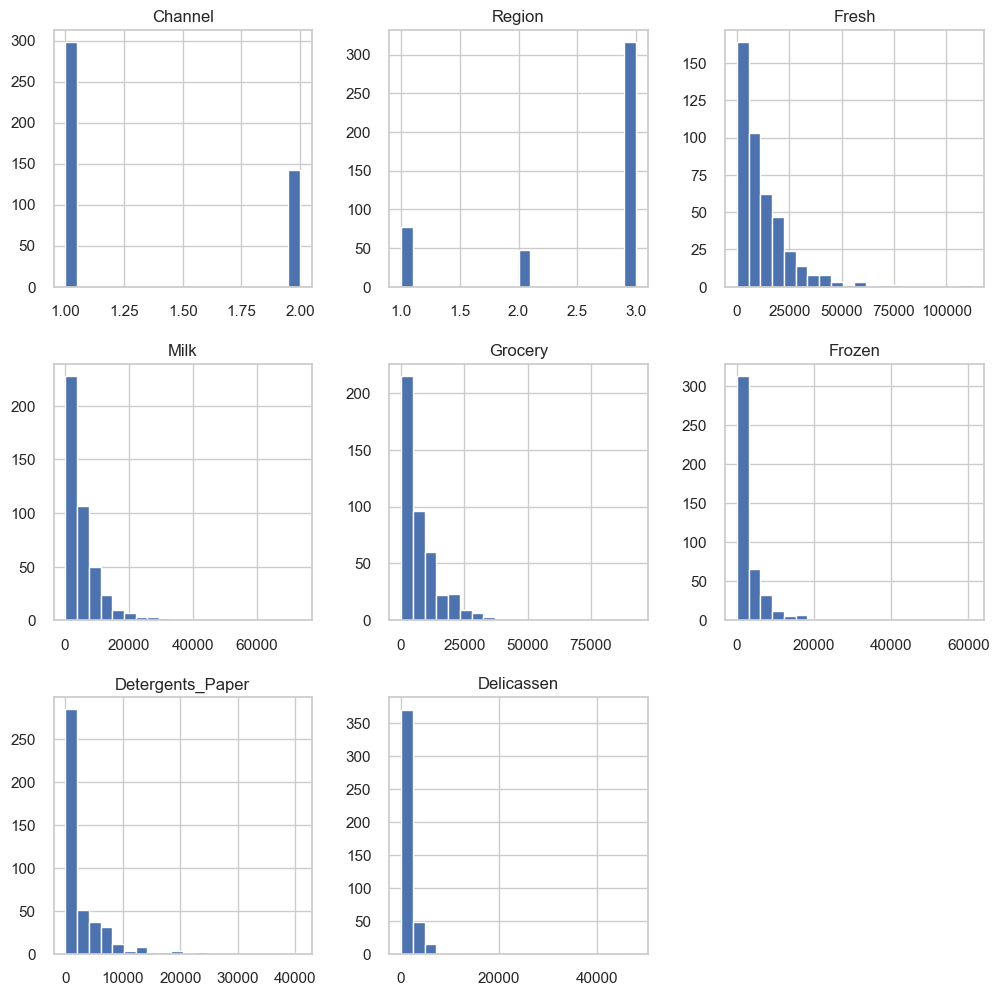

In [187]:
# Plot the distribution of each column
df.hist(figsize=(12, 12), bins=20)
plt.show()

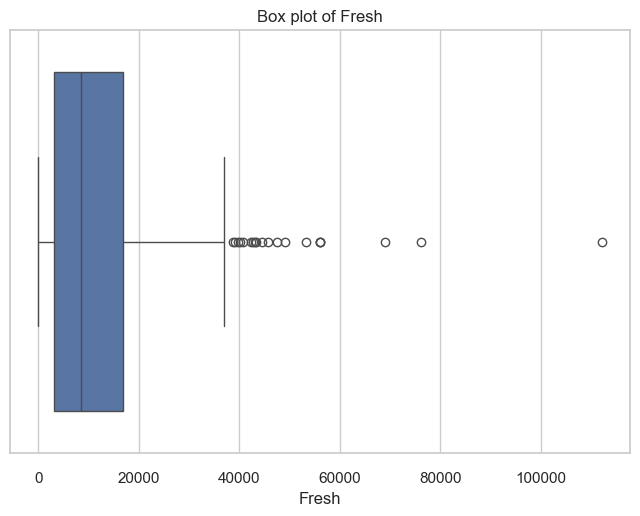

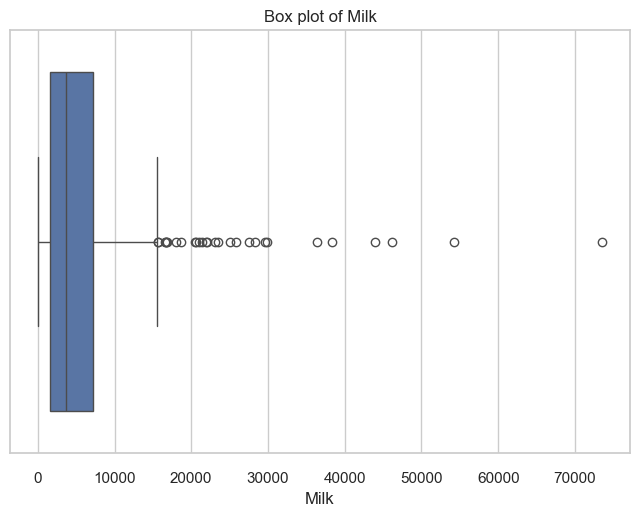

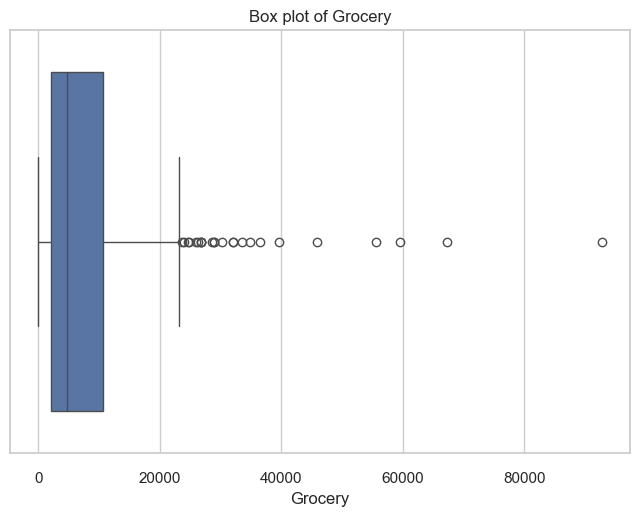

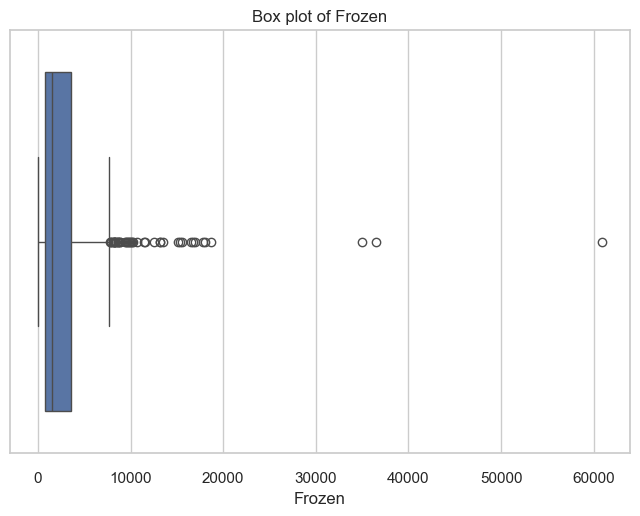

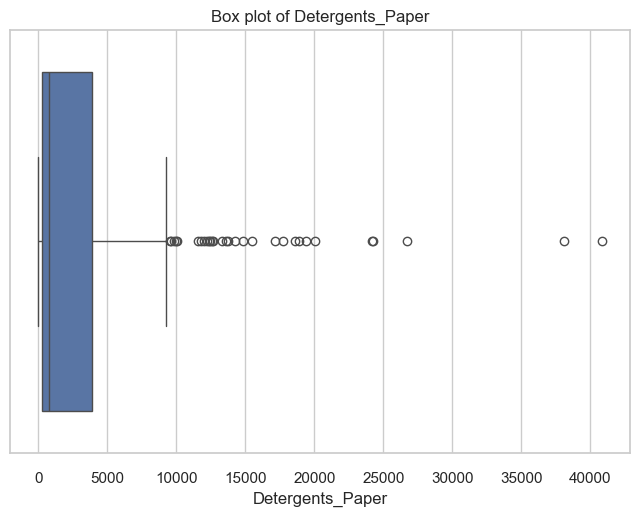

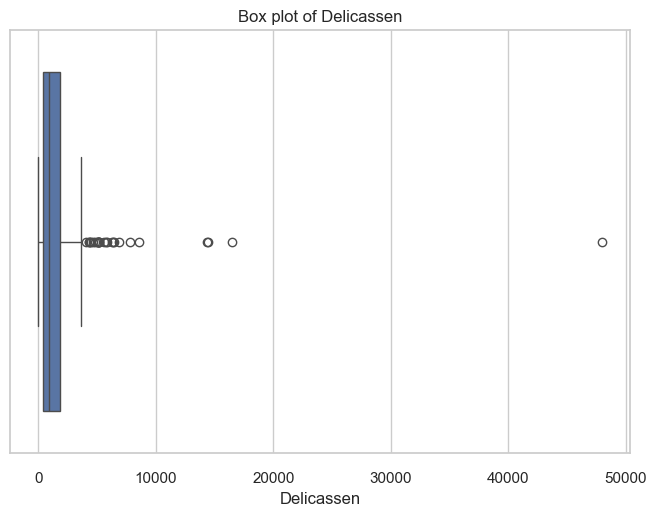

In [188]:
# Box plots to detect outliers
for column in df.columns[2:]:
    sns.boxplot(x=df[column])
    plt.title(f'Box plot of {column}')
    plt.show()

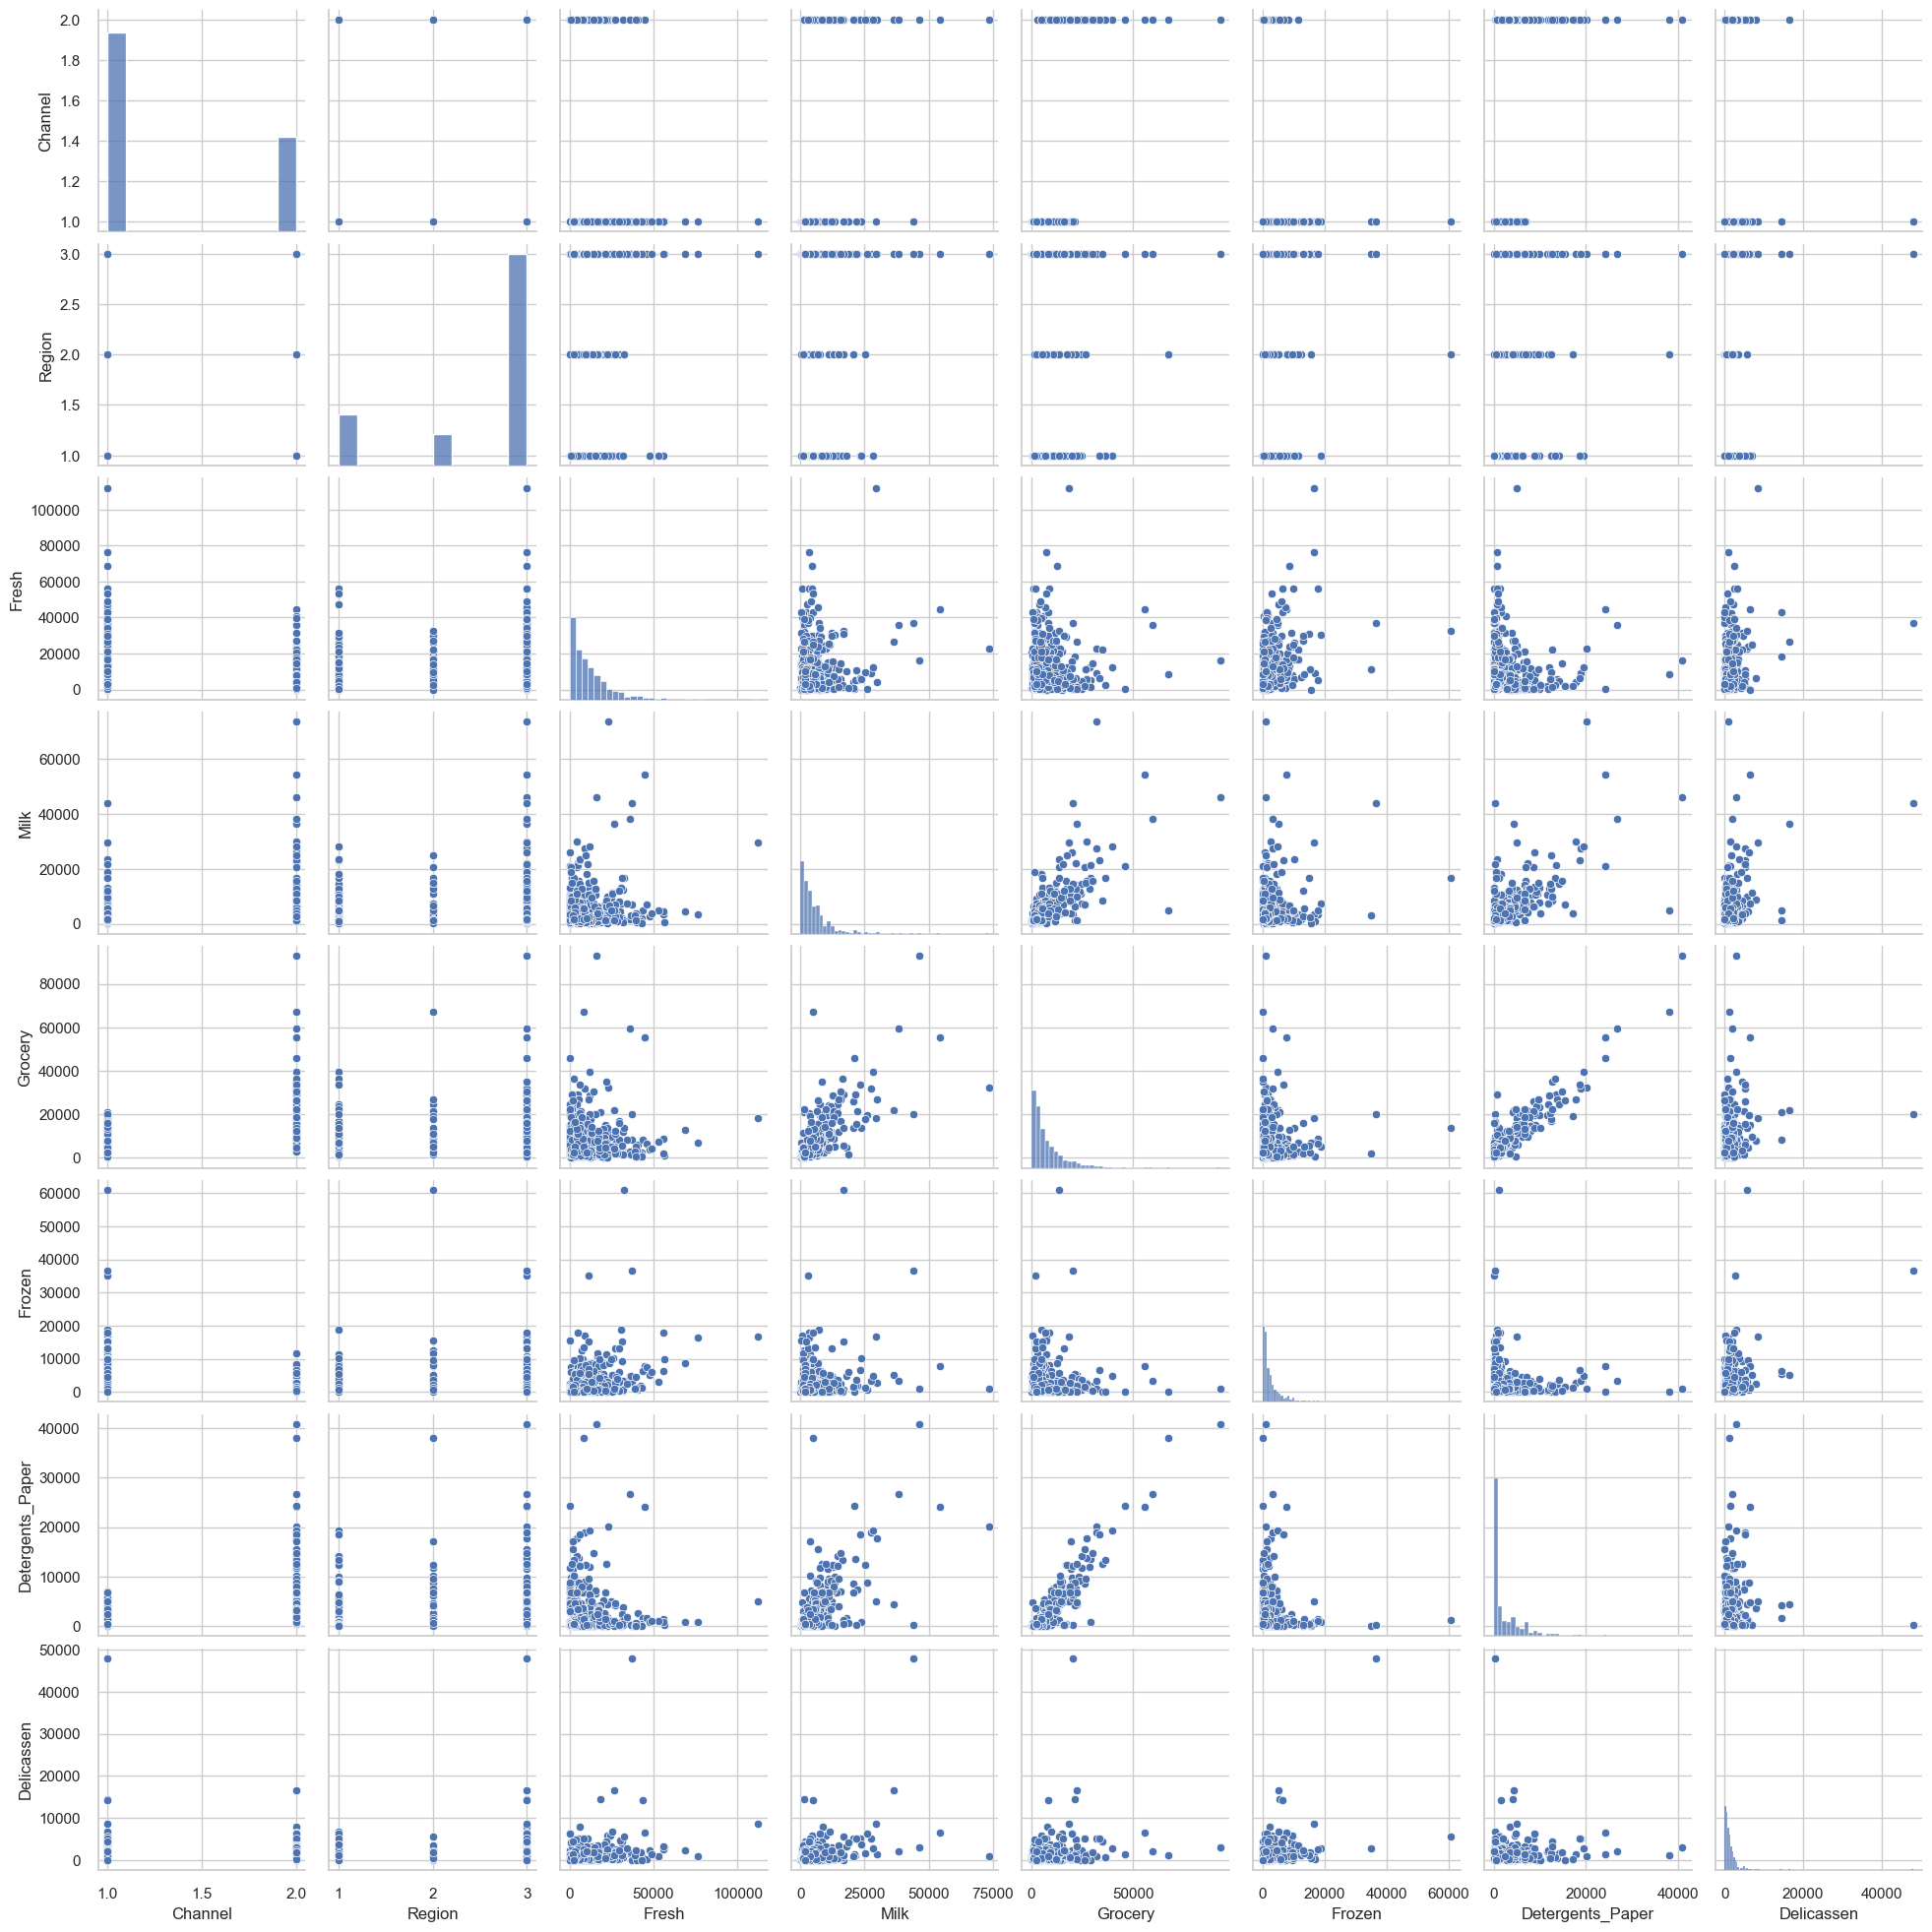

In [189]:
# Scatter plots to identify relationships
sns.pairplot(df, kind='scatter')
plt.show()

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [190]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Determine the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean DataFrame indicating whether each value is an outlier
outliers = ((df < lower_bound) | (df > upper_bound))

# Filter the DataFrame to remove the outliers
df_cleaned = df[~outliers.any(axis=1)]

print(f"Original dataframe shape: {df.shape}")
print(f"Cleaned dataframe shape: {df_cleaned.shape}")

Original dataframe shape: (440, 8)
Cleaned dataframe shape: (332, 8)


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185
   Channel  Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  31714  12319    11757     287              3881   
1        2       3  15615  12653    19858    4425              7108   
2        1       3  34454   7435     8469    2540              1711   
3        1       1  29526   7961    16966     432               363   
4        1       3  37036   7152     8253    2995                20   

   Delicassen  Total_Spending  Cumulative_Spending  \
0        2931           62894                

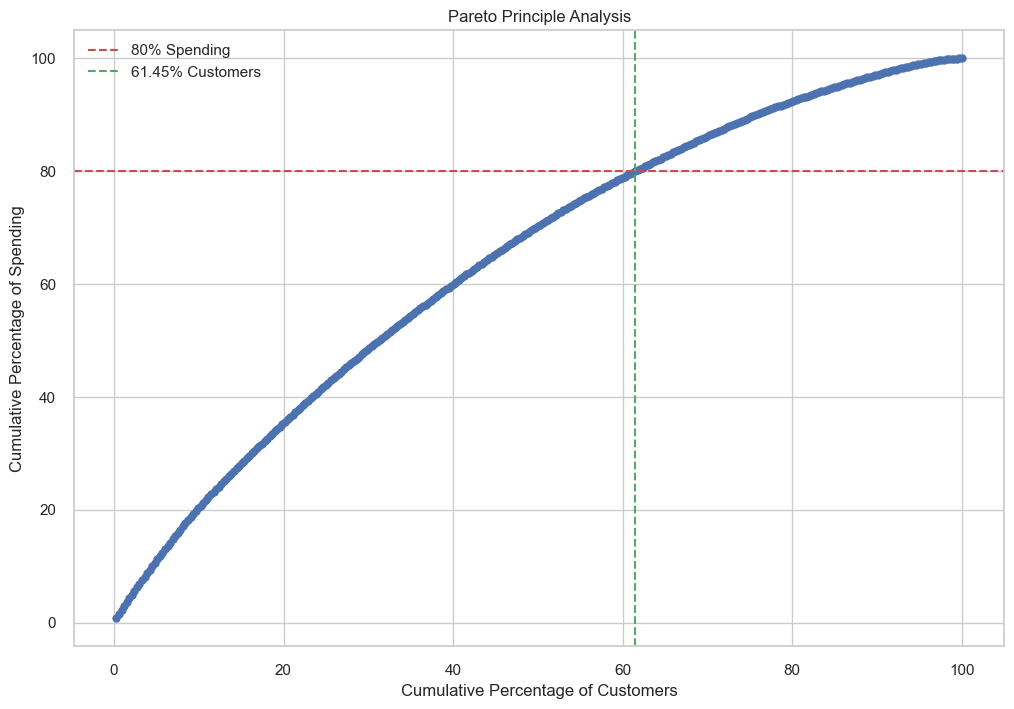

In [191]:
# Sum total spend across all categories for each customer
df_total = df_cleaned.copy()
df_total['Total_Spending'] = df_total.sum(axis=1)
print(df.head())

df_sorted = df_total.sort_values(by='Total_Spending', ascending=False).reset_index(drop=True)

# Calculate the cumulative sum of spending and the cumulative percentage of customers
df_sorted['Cumulative_Spending'] = df_sorted['Total_Spending'].cumsum()
df_sorted['Cumulative_Percentage_Customers'] = (df_sorted.index + 1) / len(df_sorted) * 100
df_sorted['Cumulative_Percentage_Spending'] = df_sorted['Cumulative_Spending'] / df_sorted['Total_Spending'].sum() * 100

print(df_sorted.head())

# Determine the point where 80% of the spending is reached
pareto_threshold = 80
pareto_customers = df_sorted[df_sorted['Cumulative_Percentage_Spending'] <= pareto_threshold]
pareto_percentage_customers = pareto_customers['Cumulative_Percentage_Customers'].max()
print(f"Percentage of customers contributing to 80% of spending: {pareto_percentage_customers:.2f}%")

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
plt.plot(df_sorted['Cumulative_Percentage_Customers'], df_sorted['Cumulative_Percentage_Spending'], marker='o', linestyle='-')
plt.axhline(y=80, color='r', linestyle='--', label='80% Spending')
plt.axvline(x=pareto_percentage_customers, color='g', linestyle='--', label=f'{pareto_percentage_customers:.2f}% Customers')
plt.title('Pareto Principle Analysis')
plt.xlabel('Cumulative Percentage of Customers')
plt.ylabel('Cumulative Percentage of Spending')
plt.legend()
plt.show()

**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [192]:
df_transformed = df_cleaned.copy()

# Convert 'Channel' and 'Region' to categorical data type
df_transformed['Channel'] = df_transformed['Channel'].astype('category')
df_transformed['Region'] = df_transformed['Region'].astype('category')

# Verify the conversion
print(df_transformed.dtypes)
print(df_transformed)



Channel             category
Region              category
Fresh                  int64
Milk                   int64
Grocery                int64
Frozen                 int64
Detergents_Paper       int64
Delicassen             int64
dtype: object
    Channel Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0         2      3  12669  9656     7561     214              2674        1338
1         2      3   7057  9810     9568    1762              3293        1776
3         1      3  13265  1196     4221    6404               507        1788
5         2      3   9413  8259     5126     666              1795        1451
6         2      3  12126  3199     6975     480              3140         545
..      ...    ...    ...   ...      ...     ...               ...         ...
432       1      3  21117  1162     4754     269              1328         395
433       1      3   1982  3218     1493    1541               356        1449
434       1      3  16731  3922     7994   

**Your comment here**

-  ...
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [182]:
from sklearn.preprocessing import StandardScaler

numerical_cols = df_transformed.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_transformed.select_dtypes(include=['category']).columns

# scaler = StandardScaler()

# df_categorical_encoded = pd.get_dummies(df_transformed[categorical_cols])
# df_scaled = pd.concat([df_numerical_scaled, df_transformed[categorical_cols].reset_index(drop=True)], axis=1)

# print(df_scaled.head())

# from sklearn.preprocessing import StandardScaler

# numerical_cols = df_transformed.select_dtypes(include=['int64', 'float64']).columns
# categorical_cols = df_transformed.select_dtypes(include=['category']).columns

# scaler = StandardScaler()

# matrix_scaled = scaler.fit_transform(df_transformed)
# df_numerical_scaled = pd.DataFrame(matrix_scaled, columns=df_transformed.columns)

# df_scaled = df_numerical_scaled

scaler = StandardScaler()
matrix_scaled = scaler.fit_transform(df_transformed[numerical_cols])
df_numerical_scaled = pd.DataFrame(matrix_scaled, columns=numerical_cols)


customers_scale = df_numerical_scaled

print(customers_scale.describe())





              Fresh          Milk       Grocery        Frozen  \
count  3.320000e+02  3.320000e+02  3.320000e+02  3.320000e+02   
mean  -1.177104e-16  1.284113e-16  5.350472e-17 -1.605142e-17   
std    1.001509e+00  1.001509e+00  1.001509e+00  1.001509e+00   
min   -1.171159e+00 -1.206045e+00 -1.167208e+00 -1.077834e+00   
25%   -8.046657e-01 -8.196810e-01 -7.680096e-01 -7.512086e-01   
50%   -2.532536e-01 -3.031893e-01 -4.054816e-01 -3.474711e-01   
75%    5.447986e-01  6.391958e-01  6.067743e-01  4.248196e-01   
max    3.373029e+00  3.238851e+00  3.258853e+00  3.412828e+00   

       Detergents_Paper    Delicassen  
count      3.320000e+02  3.320000e+02  
mean       2.140189e-17 -6.955614e-17  
std        1.001509e+00  1.001509e+00  
min       -8.344848e-01 -1.231424e+00  
25%       -7.368924e-01 -7.967938e-01  
50%       -5.305085e-01 -2.947372e-01  
75%        6.409204e-01  5.338233e-01  
max        2.990711e+00  3.183516e+00  


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

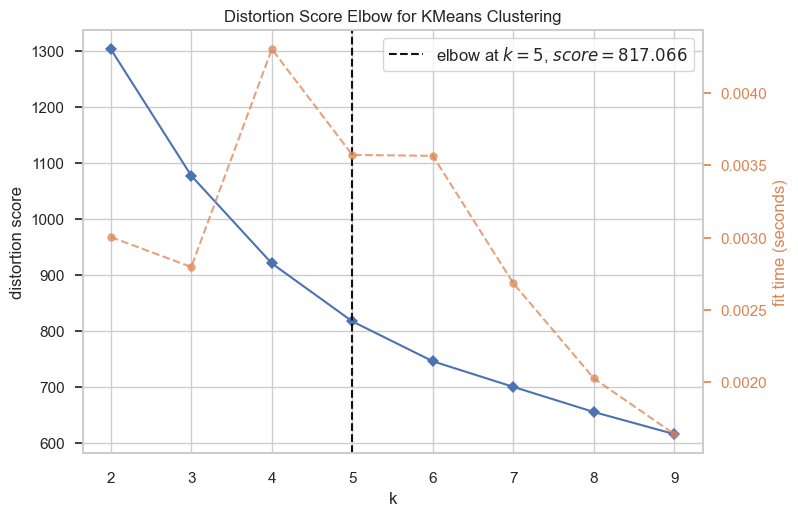

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [193]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))
visualizer.fit(customers_scale)
visualizer.show()


### Looking to the elbow we can choose 2 like the correct number of clusters

In [195]:
import plotly.graph_objects as go  #for 3D plot

# K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(customers_scale)
kmeans_clusters = kmeans.labels_

def plot_3d(df, col1, col2, col3, labels):
    # Select columns
    X = df[[col1, col2, col3]].values

    # 3D plot
    scene = dict(
        xaxis=dict(title=f'{col1} -->'),
        yaxis=dict(title=f'{col2} -->'),
        zaxis=dict(title=f'{col3} -->')
    )

    trace = go.Scatter3d(
        x=X[:, 0], y=X[:, 1], z=X[:, 2],
        mode='markers',
        marker=dict(color=labels, size=10, line=dict(color='black', width=10))
    )

    layout = go.Layout(margin=dict(l=0, r=0), scene=scene, height=800, width=800)
    data = [trace]
    fig = go.Figure(data=data, layout=layout)
    fig.show()

# Example usage
plot_3d(customers_scale, 'Detergents_Paper', 'Milk', 'Grocery', kmeans_clusters)

Count the values in `labels`.

In [ ]:
# Your code here:

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

Optimal eps value: 1.127463731865933
Maximum number of clusters: 2


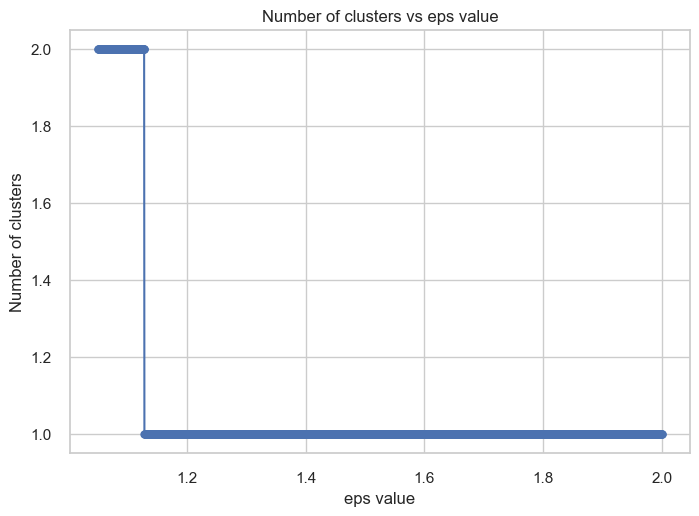

In [258]:
# from sklearn.cluster import DBSCAN 

# # Your code here
# dbscan = DBSCAN(eps=0.6, min_samples=20)
# dbscan_clusters = dbscan.fit_predict(customers_scale)

# print(dbscan_clusters)
# n_clusters_ = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
# n_noise_ = list(dbscan_clusters).count(-1)

# print(f'Estimated number of clusters: {n_clusters_}')
# print(f'Estimated number of noise points: {n_noise_}')


# plot_3d(customers_scale, 'Detergents_Paper', 'Milk', 'Grocery', dbscan_clusters)

import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Example data frame and scaled data
# Assuming 'customers_scale' is your scaled data

# Function to find the optimal eps value
def find_optimal_eps(customers_scale, eps_values):
    max_clusters = 0
    optimal_eps = eps_values[0]
    clusters_per_eps = []

    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=10)
        dbscan_clusters = dbscan.fit_predict(customers_scale)
        n_clusters_ = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
        clusters_per_eps.append(n_clusters_)

        if n_clusters_ >= max_clusters:
            max_clusters = n_clusters_
            optimal_eps = eps

    return optimal_eps, max_clusters, clusters_per_eps

# Define the range of eps values to search
eps_values = np.linspace(1.05, 2.0, 2000)

# Find the optimal eps
optimal_eps, max_clusters, clusters_per_eps = find_optimal_eps(customers_scale, eps_values)

print(f'Optimal eps value: {optimal_eps}')
print(f'Maximum number of clusters: {max_clusters}')

# Plot the number of clusters for each eps value
plt.plot(eps_values, clusters_per_eps, marker='o')
plt.xlabel('eps value')
plt.ylabel('Number of clusters')
plt.title('Number of clusters vs eps value')
plt.show()

Count the values in `labels_DBSCAN`.

In [259]:
from sklearn.cluster import DBSCAN 

# Your code here
dbscan = DBSCAN(eps=1.12, min_samples=10)
dbscan_clusters = dbscan.fit_predict(customers_scale)

print(dbscan_clusters)
n_clusters_ = len(set(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)
n_noise_ = list(dbscan_clusters).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')


plot_3d(customers_scale, 'Detergents_Paper', 'Milk', 'Grocery', dbscan_clusters)

[-1 -1 -1 -1  0  1  0 -1 -1  0 -1 -1 -1  0  1 -1  0 -1  0  0  0  0 -1  0
  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0  0 -1  0  1  0 -1 -1  0 -1 -1
 -1  0  1  0 -1  0  0  0 -1 -1  0  0 -1  0 -1  0 -1  0  0  0 -1 -1  1  0
  0 -1 -1  1  0 -1  0  0  0  0  0 -1  0  0  0  0 -1 -1 -1 -1  0  0  0  0
  0  0 -1 -1 -1  0 -1 -1 -1  0  0  0  0 -1  0  0  0 -1  0 -1  0  1 -1 -1
  0  0 -1 -1 -1  0  0  0 -1  0  0  1 -1  0 -1 -1 -1  0  0  0 -1 -1 -1 -1
  0  0 -1  0  1  0  0  0  0  0 -1  0  0  0  1  1 -1  0  0  0 -1  0  0  0
  0 -1  0 -1  0 -1  0  0 -1  0  0 -1  0  0  0  0  1 -1  0  0  0  0  0 -1
 -1 -1  0 -1  0  0  0 -1 -1 -1 -1 -1  0  0  0 -1 -1  0  0 -1 -1 -1  0  1
  0  0  0  0  0 -1 -1  0  0  0  1  0 -1 -1 -1 -1 -1  0  0 -1  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0 -1  1  1  0  0 -1 -1  0  0  0
 -1 -1  0  0 -1  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0 -1  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1 -1 -1  0 -1  0  0 -1
  0  1 -1  1 -1  0 -1 -1  0  0 -1 -1  0 -1 -1  0  0

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

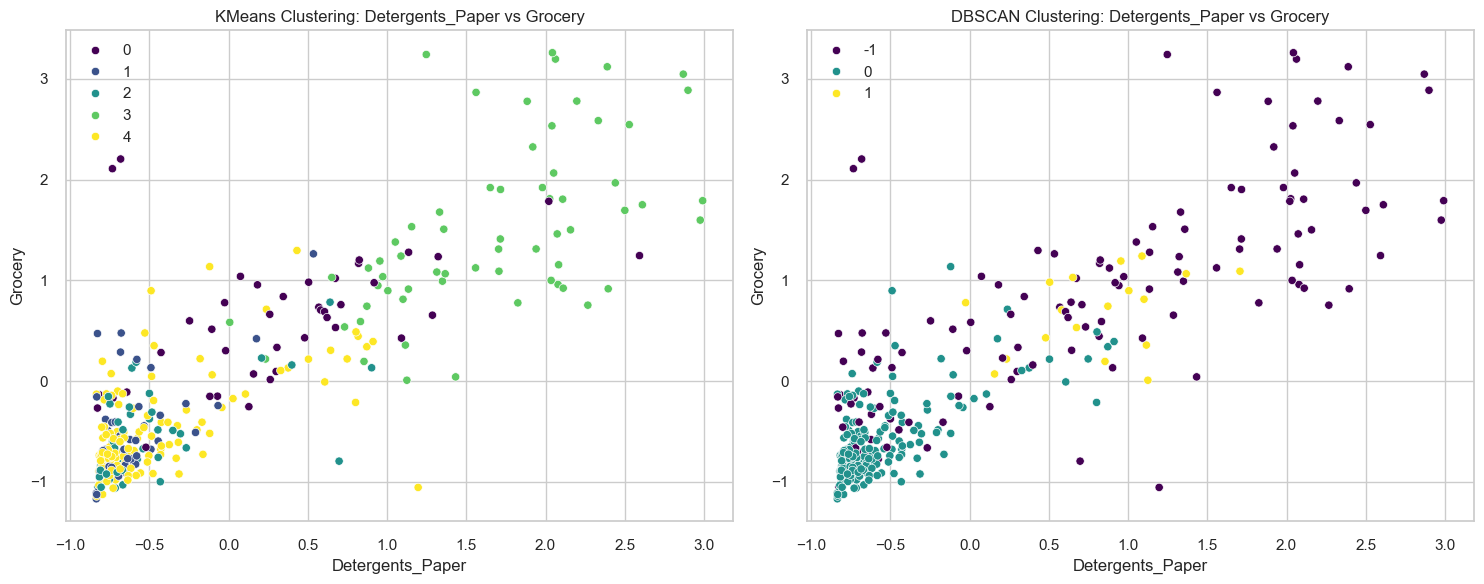

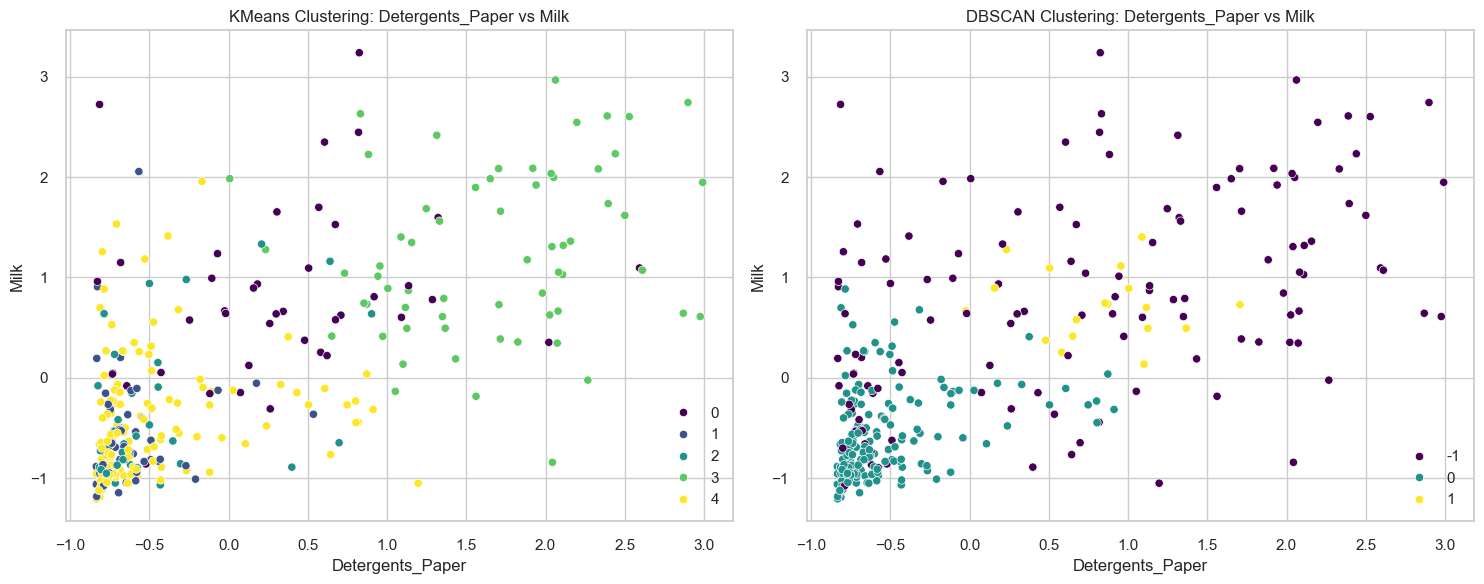

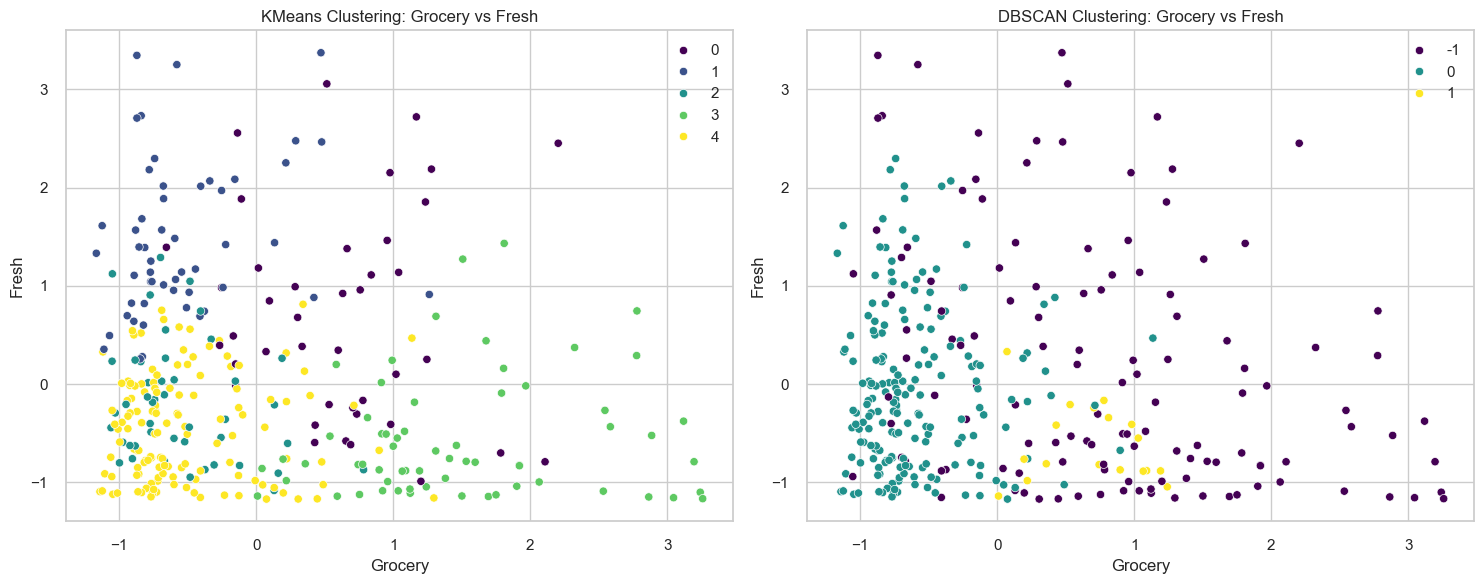

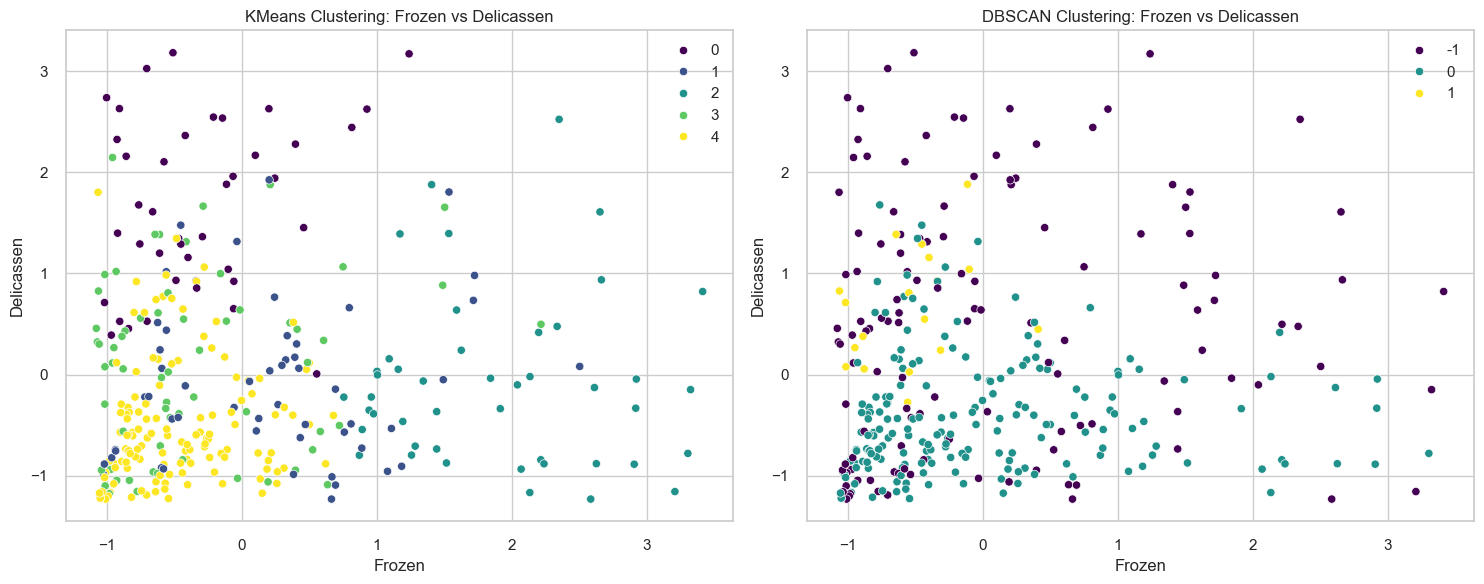

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_2d_comparison(df, col1, col2, labels_kmeans, labels_dbscan):
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    sns.scatterplot(ax=axes[0], x=df[col1], y=df[col2], hue=labels_kmeans, palette='viridis')
    axes[0].set_title(f'KMeans Clustering: {col1} vs {col2}')

    sns.scatterplot(ax=axes[1], x=df[col1], y=df[col2], hue=labels_dbscan, palette='viridis')
    axes[1].set_title(f'DBSCAN Clustering: {col1} vs {col2}')

    plt.tight_layout()
    plt.show()

# Example usage
plot_2d_comparison(customers_scale, 'Detergents_Paper', 'Grocery', kmeans_clusters, dbscan_clusters)
plot_2d_comparison(customers_scale, 'Detergents_Paper', 'Milk', kmeans_clusters, dbscan_clusters)
plot_2d_comparison(customers_scale, 'Grocery', 'Fresh', kmeans_clusters, dbscan_clusters)
plot_2d_comparison(customers_scale, 'Frozen', 'Delicassen', kmeans_clusters, dbscan_clusters)

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [ ]:
# Your code here:

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [ ]:
# Your code here:

Which algorithm appears to perform better?

**Your observations here**

- 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [41]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 